## Real Estate Price  Predictor Project 

In [713]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [714]:
col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [715]:
housing = pd.read_csv("E:\Excel Data\Real Estate Data.csv",names=col)

In [716]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [717]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [718]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    object 
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.6+ KB


In [719]:
housing['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [720]:
housing.describe()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [721]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

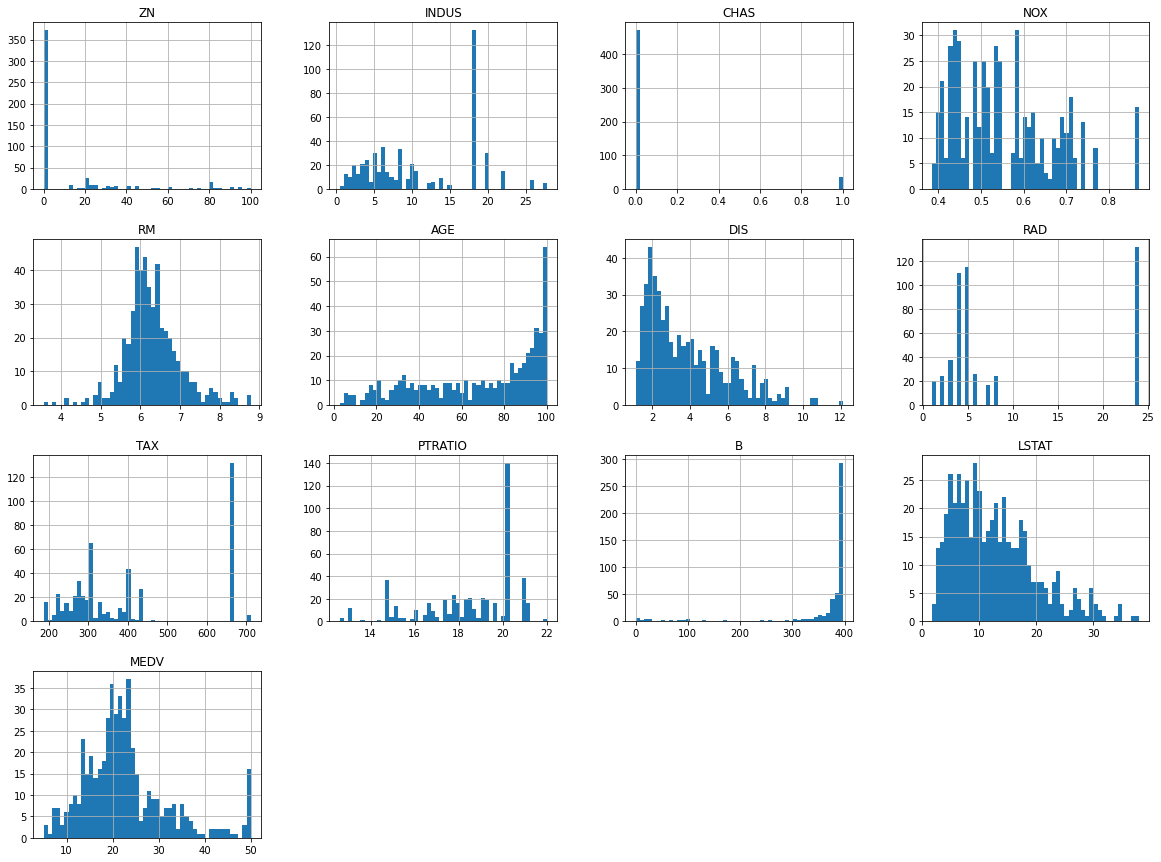

In [722]:
housing.hist(bins=50,figsize=(20,15))

# Train Test Splitting 

In [723]:
#for learning purpose
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled [:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [724]:
#train_set,test_set = split_train_test(housing,0.2)

In [725]:
#print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [726]:
# Removed Nan Value
housing.isna().sum()
housing[housing["CHAS"].isna()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
506,0.04741 0.00 11.930 0 0.5730 6.0300 80...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [727]:
housing.dropna(inplace= True)

In [728]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size = 0.2,random_state = 42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [729]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 ,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [730]:
strat_test_set['CHAS'].value_counts()

0.0    95
1.0     7
Name: CHAS, dtype: int64

In [731]:
strat_train_set['CHAS'].value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [732]:
#95/7

In [733]:
#376/28

In [734]:
housing = strat_train_set.copy()

# Looking for Correlations

In [735]:
corr_matrix = housing.corr()

In [736]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

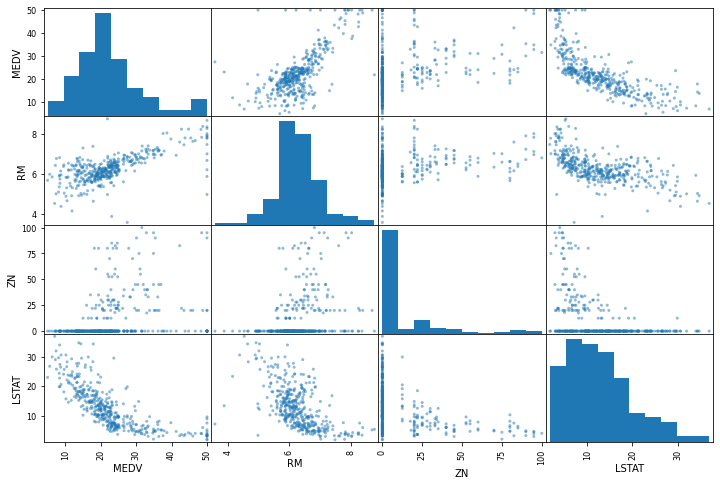

In [737]:
from pandas.plotting import scatter_matrix
attributes  = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

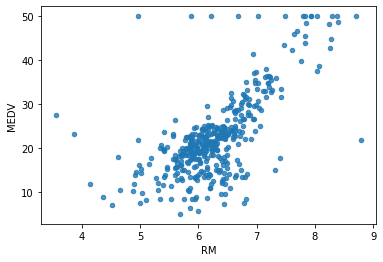

In [738]:
housing.plot(kind="scatter",x= "RM",y ="MEDV",alpha = 0.8)

# Trying out Attributes Combinations

In [739]:
housing ["TAXRM"]=housing ["TAX"]/housing["RM"]

In [740]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0,45.468948


In [741]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

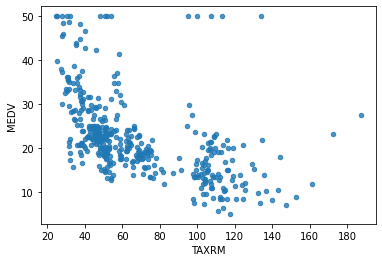

In [742]:
housing.plot(kind = "scatter",x= "TAXRM",y ="MEDV",alpha = 0.8)

In [743]:
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set ["MEDV"].copy()

# Missing Attributes

In [744]:
#To take care of missing attributes you have three options:
    #1. Get rid of the missing data points 
    #2. Get rid of whole attribute
    #3. Set the value to some value (0, mean or median)

In [745]:
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [746]:
housing.shape

(404, 13)

In [747]:
housing.describe()#Before we started filling missing attributes

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [748]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = "mean")
imputer.fit(housing)

SimpleImputer()

In [749]:
imputer.statistics_

array([3.60281403e+00, 1.08366337e+01, 1.13449505e+01, 6.93069307e-02,
       5.58063614e-01, 6.27990842e+00, 6.90398515e+01, 3.74620965e+00,
       9.73514851e+00, 4.12341584e+02, 1.84732673e+01, 3.53392822e+02,
       1.27916089e+01])

In [750]:
x = imputer.transform(housing)

In [751]:
housing_tr = pd.DataFrame(x, columns = housing.columns)

In [752]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

# Creating Pipelines

In [753]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy = "median")),
    ("std_scaler",StandardScaler()),
])

In [754]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [755]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting a desired model for Dragon Estate

In [756]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
model = RandomForestRegressor()
#model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [757]:
some_data = housing.iloc[:5]

In [758]:
some_labels= housing_labels.iloc[:5]

In [759]:
prepared_data = my_pipeline.transform(some_data)


In [760]:
model.predict(prepared_data)

array([22.513, 25.979, 16.602, 23.421, 23.496])

In [761]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluting The Model

In [762]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse =mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [763]:
rmse

1.179704512843687

# Using better evaluation technique = Cross validation

In [764]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [765]:
rmse_scores
#Error rate

array([2.86902702, 2.92118073, 4.40326319, 2.63306035, 3.20659418,
       2.66430386, 4.60803078, 3.25753676, 3.14542836, 3.28222712])

In [766]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [767]:
print_scores(rmse_scores)

Scores: [2.86902702 2.92118073 4.40326319 2.63306035 3.20659418 2.66430386
 4.60803078 3.25753676 3.14542836 3.28222712]
Mean: 3.2990652344853286
Standard deviation: 0.6435076786742316


# Saving the model

In [768]:
from joblib import dump,load
dump(model,"Dragon.joblib")

['Dragon.joblib']

# Testing the model on test Data

In [773]:
x_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions,list(y_test))

In [770]:
final_rmse

2.9158188907957845